# ADS 599: Retail Dataset Capstone Project
#### By Jesse Gutierrez, Verity Pierson, & Sultan Mahmud Rahat

##### Load Req. Packages

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


#### While the dataset is complete containing all necessary attributes, we want to mimic data sources as expected to be found. Therefore, we split the data into subsets and assigned primary/foreign keys based on what would be anticipated.

In [2]:
# Load csv file downloaded from kaggle
df = pd.read_csv("Datasets/retail_data.csv")

# Display output
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [3]:
# Subset data based on data sources (receiving, sales, website, etc.)
customer_info = df[['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment']]
transaction_details = df[['Transaction_ID', 'Customer_ID', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount']]
transaction_logistics = df[['Transaction_ID', 'Shipping_Method', 'Payment_Method', 'Order_Status']]

# Generate a Product_ID for each unique product w/ leading zeros
unique_products = df['products'].unique()
product_mapping = {product: f'P{idx:03}' for idx, product in enumerate(unique_products)}

# Map the Product_IDs back to the dataframe
df['Product_ID'] = df['products'].map(product_mapping)

# Create product_info w/ Product_ID & Transaction_ID
product_info = df[['Product_ID', 'Transaction_ID', 'Product_Category', 'Product_Brand', 'Product_Type', 'products']]

# Add Product_ID to feedback
feedback = df[['Product_ID', 'Feedback', 'Ratings']]

# Verify the data
customer_info.head()

,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment
0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular
1,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium
2,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular
3,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium
4,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium


In [4]:
# Display the range of Product_IDs
product_ids = df['Product_ID'].unique()
print("Range of Product_IDs:", min(product_ids), "to", max(product_ids))

# Count of unique Product_IDs
print("Total unique Product_IDs:", len(product_ids))

# Verify the number of unique products
print("Total unique products:", len(unique_products))

Range of Product_IDs: P000 to P317
Total unique Product_IDs: 318
Total unique products: 318


In [5]:
# Save customer_info subset to CSV
customer_info.to_csv('/Users/jesse/Desktop/School/University of San Diego/ADS 599- Capstone/Retail_Analysis/Datasets/customer_info.csv', index=False)

# Save transaction_details subset to CSV
transaction_details.to_csv('/Users/jesse/Desktop/School/University of San Diego/ADS 599- Capstone/Retail_Analysis/Datasets/transaction_details.csv', index=False)

# Save transaction_logistics subset to CSV
transaction_logistics.to_csv('/Users/jesse/Desktop/School/University of San Diego/ADS 599- Capstone/Retail_Analysis/Datasets/transaction_logistics.csv', index=False)

# Save product_info subset to CSV
product_info.to_csv('/Users/jesse/Desktop/School/University of San Diego/ADS 599- Capstone/Retail_Analysis/Datasets/product_info.csv', index=False)

# Save feedback subset to CSV
feedback.to_csv('/Users/jesse/Desktop/School/University of San Diego/ADS 599- Capstone/Retail_Analysis/Datasets/feedback.csv', index=False)

# Confirm output
print("CSV files saved successfully.")

CSV files saved successfully.


#### Once the data has been split, we are going to use a local database using SQLite

In [6]:
# Pathway to the datasets
datasets_path = '/Users/jesse/Desktop/School/University of San Diego/ADS 599- Capstone/Retail_Analysis/Datasets/'

# CSV files
csv_files = {
    'customer_info': 'customer_info.csv',
    'transaction_details': 'transaction_details.csv',
    'product_info': 'product_info.csv',
    'feedback': 'feedback.csv',
    'transaction_logistics': 'transaction_logistics.csv'
}

# Create a connection to the SQLite database
conn = sqlite3.connect('retail_analysis.db')
cursor = conn.cursor()

# Load each CSV into the SQLite database
for table_name, csv_file in csv_files.items():
    df = pd.read_csv(datasets_path + csv_file)
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    print(f"Loaded {csv_file} into table {table_name}")

# Fx to get column names & types
def get_table_info(table_name):
    query = f'PRAGMA table_info({table_name});'
    result = pd.read_sql_query(query, conn)
    return result[['name', 'type']]

# Get the list of table names
table_names_query = "SELECT name FROM sqlite_master WHERE type='table';"
table_names = pd.read_sql_query(table_names_query, conn)

# Print table names w/ column names & types
for table_name in table_names['name']:
    print(f"Table: {table_name}")
    table_info = get_table_info(table_name)
    print(table_info)
    print("\n")

# Close the connection
conn.close()

Loaded customer_info.csv into table customer_info
Loaded transaction_details.csv into table transaction_details
Loaded product_info.csv into table product_info
Loaded feedback.csv into table feedback
Loaded transaction_logistics.csv into table transaction_logistics
Table: customer_info
                name  type
0        Customer_ID  REAL
1               Name  TEXT
2              Email  TEXT
3              Phone  REAL
4            Address  TEXT
5               City  TEXT
6              State  TEXT
7            Zipcode  REAL
8            Country  TEXT
9                Age  REAL
10            Gender  TEXT
11            Income  TEXT
12  Customer_Segment  TEXT


Table: transaction_details
              name  type
0   Transaction_ID  REAL
1      Customer_ID  REAL
2             Date  TEXT
3             Year  REAL
4            Month  TEXT
5             Time  TEXT
6  Total_Purchases  REAL
7           Amount  REAL
8     Total_Amount  REAL


Table: product_info
               name  type
0       

#### Exploratory Data Analysis

In [7]:
# Connect to the database
conn = sqlite3.connect('retail_analysis.db')

# Load data into dataframes using pandas
customer_info = pd.read_sql_query("SELECT * FROM customer_info", conn)
transaction_details = pd.read_sql_query("SELECT * FROM transaction_details", conn)
transaction_logistics = pd.read_sql_query("SELECT * FROM transaction_logistics", conn)
product_info = pd.read_sql_query("SELECT * FROM product_info", conn)
feedback = pd.read_sql_query("SELECT * FROM feedback", conn)

In [8]:
# Check for null values
customer_info.isnull().sum()

Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
dtype: int64

In [9]:
# Check for null values
transaction_details.isnull().sum()

Transaction_ID     333
Customer_ID        308
Date               359
Year               350
Month              273
Time               350
Total_Purchases    361
Amount             357
Total_Amount       350
dtype: int64

In [10]:
# Check for null values
transaction_logistics.isnull().sum()

Transaction_ID     333
Shipping_Method    337
Payment_Method     297
Order_Status       235
dtype: int64

In [11]:
# Check for null values
product_info.isnull().sum()

Product_ID            0
Transaction_ID      333
Product_Category    283
Product_Brand       281
Product_Type          0
products              0
dtype: int64

In [12]:
# Check for null values
feedback.isnull().sum()

Product_ID      0
Feedback      184
Ratings       184
dtype: int64

In [13]:
# Need to address null values

In [14]:
customer_info.describe()

,Customer_ID,Phone,Zipcode,Age
count,301702.000000,3.016480e+05,301670.000000,301837.000000
mean,55006.553934,5.501464e+09,50298.951019,35.481326
std,26005.675200,2.596017e+09,28972.807134,15.021933
min,10000.000000,1.000049e+09,501.000000,18.000000
25%,32469.250000,3.255061e+09,25425.000000,22.000000
50%,55012.000000,5.505812e+09,50602.500000,32.000000
75%,77511.000000,7.749860e+09,75252.000000,46.000000
max,99999.000000,9.999996e+09,99949.000000,70.000000


In [15]:
transaction_details.describe()

,Transaction_ID,Customer_ID,Year,Total_Purchases,Amount,Total_Amount
count,3.016770e+05,301702.000000,301660.000000,301649.000000,301653.000000,301660.000000
mean,5.495823e+06,55006.553934,2023.165113,5.359729,255.163659,1367.651156
std,2.595565e+06,26005.675200,0.371283,2.868575,141.389640,1128.998515
min,1.000007e+06,10000.000000,2023.000000,1.000000,10.000219,10.003750
25%,3.247930e+06,32469.250000,2023.000000,3.000000,132.890764,438.724278
50%,5.499657e+06,55012.000000,2023.000000,5.000000,255.470969,1041.117547
75%,7.739509e+06,77511.000000,2023.000000,8.000000,377.672606,2029.999853
max,9.999995e+06,99999.000000,2024.000000,10.000000,499.997911,4999.625796


In [16]:
feedback.describe()

,Ratings
count,301826.000000
mean,3.162670
std,1.320827
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


## Customer Information

In [17]:
# Customer location
country_percentage = customer_info['Country'].value_counts(normalize=True) * 100

# Display results
country_percentage

Country
USA          31.558068
UK           20.900845
Germany      17.508509
Australia    15.019272
Canada       15.013306
Name: proportion, dtype: float64

In [18]:
# What are the total transaction per the lifetime of a customer?
average_transactions_per_customer = transaction_details.groupby('Customer_ID')['Transaction_ID'].count().mean()
average_transactions_per_customer =average_transactions_per_customer.round(2)

# Display results
print(f"What are the total transaction per the lifetime of a customer? {average_transactions_per_customer}")

What are the total transaction per the lifetime of a customer? 3.47


In [19]:
# Merge transaction_details & customer_info on Customer_ID
merged_df_transactions = pd.merge(transaction_details, customer_info, on='Customer_ID')

# Group by Country & calculate average transactions per customer
avg_transactions_by_country = merged_df_transactions.groupby('Country').agg({
    'Transaction_ID': 'count',
    'Customer_ID': 'nunique'
}).reset_index()

avg_transactions_by_country['Avg_Transactions_Per_Customer'] = (
    avg_transactions_by_country['Transaction_ID'] / avg_transactions_by_country['Customer_ID']
).round(2)

# Display results
print("Average transactions per customer by country:")
print(avg_transactions_by_country[['Country', 'Avg_Transactions_Per_Customer']])

Average transactions per customer by country:
     Country  Avg_Transactions_Per_Customer
0  Australia                           5.90
1     Canada                           6.04
2    Germany                           6.26
3         UK                           6.54
4        USA                           7.63


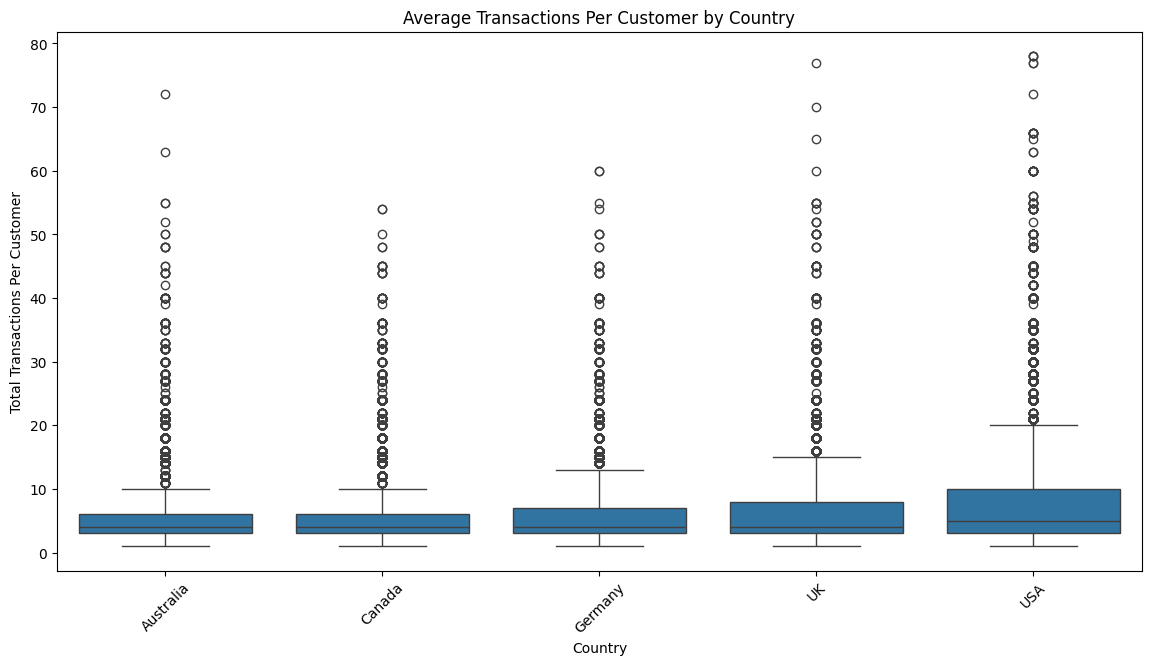

In [20]:
# Calculate total transactions per customer
transactions_per_customer = merged_df_transactions.groupby(['Country', 'Customer_ID']).size().reset_index(name='Total_Transactions')

# Box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Country', y='Total_Transactions', data=transactions_per_customer)
plt.title('Average Transactions Per Customer by Country')
plt.xlabel('Country')
plt.ylabel('Total Transactions Per Customer')
plt.xticks(rotation=45)
plt.show()

In [21]:
# How many items does a customer get per transaction?
average_products_per_transaction = transaction_details['Total_Purchases'].mean()
average_products_per_transaction = average_products_per_transaction.round(2)

# Display results
print(f"How many items does a customer get per transaction? {average_products_per_transaction}")

How many items does a customer get per transaction? 5.36


In [22]:
# Merge transaction_details 2/ customer_info on Customer_ID
merged_df_products = pd.merge(transaction_details, customer_info, on='Customer_ID')

# Group by Country & calculate average products per transaction
avg_products_by_country = merged_df_products.groupby('Country')['Total_Purchases'].mean().reset_index()
avg_products_by_country['Total_Purchases'] = avg_products_by_country['Total_Purchases'].round(2)

# Display results
print("Average items per transaction by country:")
print(avg_products_by_country[['Country', 'Total_Purchases']])

Average items per transaction by country:
     Country  Total_Purchases
0  Australia             5.37
1     Canada             5.37
2    Germany             5.36
3         UK             5.38
4        USA             5.36


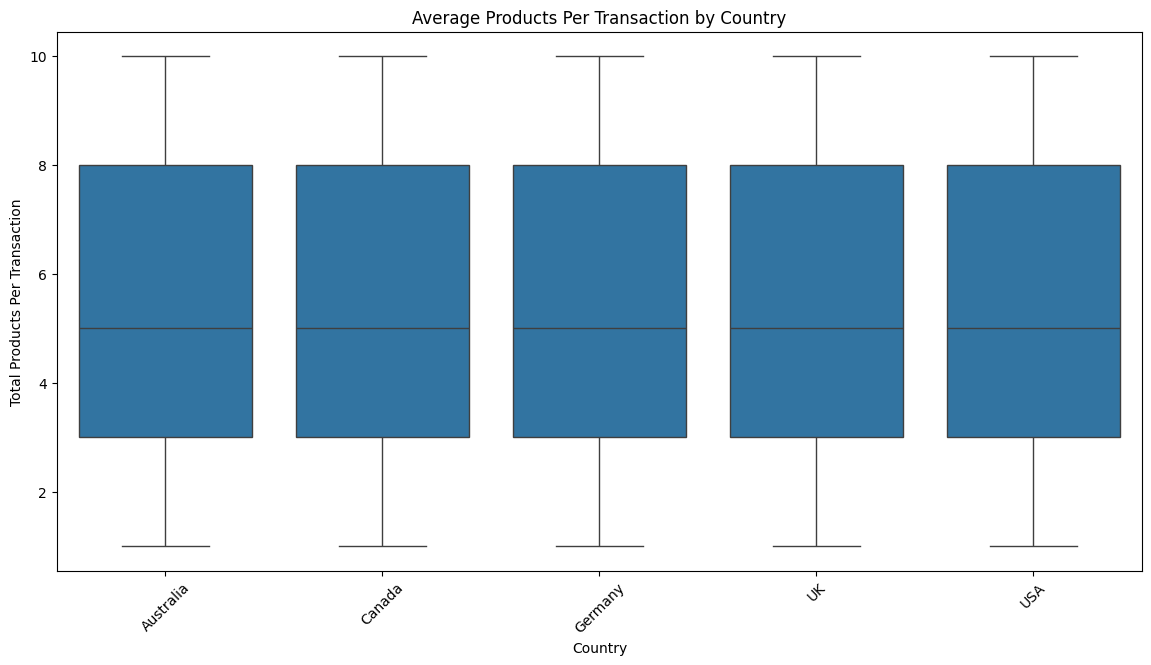

In [23]:
# Group by Country & calculate average products per transaction
products_per_transaction = merged_df_products.groupby(['Country', 'Transaction_ID'])['Total_Purchases'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.boxplot(x='Country', y='Total_Purchases', data=products_per_transaction)
plt.title('Average Products Per Transaction by Country')
plt.xlabel('Country')
plt.ylabel('Total Products Per Transaction')
plt.xticks(rotation=45)
plt.show()

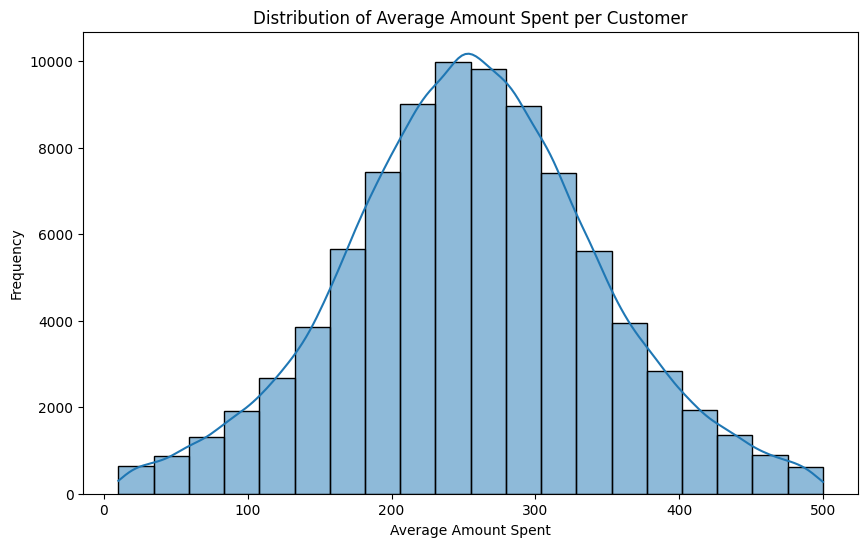

In [24]:
# Amount spent per transaction
plt.figure(figsize=(10, 6))
sns.histplot(transaction_details.groupby('Customer_ID')['Amount'].mean(), bins=20, kde=True)
plt.title('Distribution of Average Amount Spent per Customer')
plt.xlabel('Average Amount Spent')
plt.ylabel('Frequency')
plt.show()

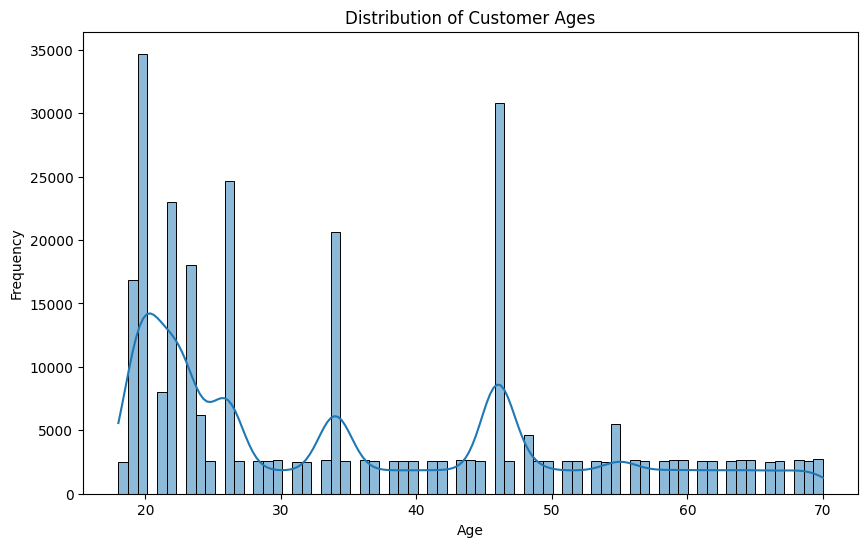

In [25]:
# Distribution of Customer Ages
plt.figure(figsize=(10, 6))
sns.histplot(customer_info['Age'], kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

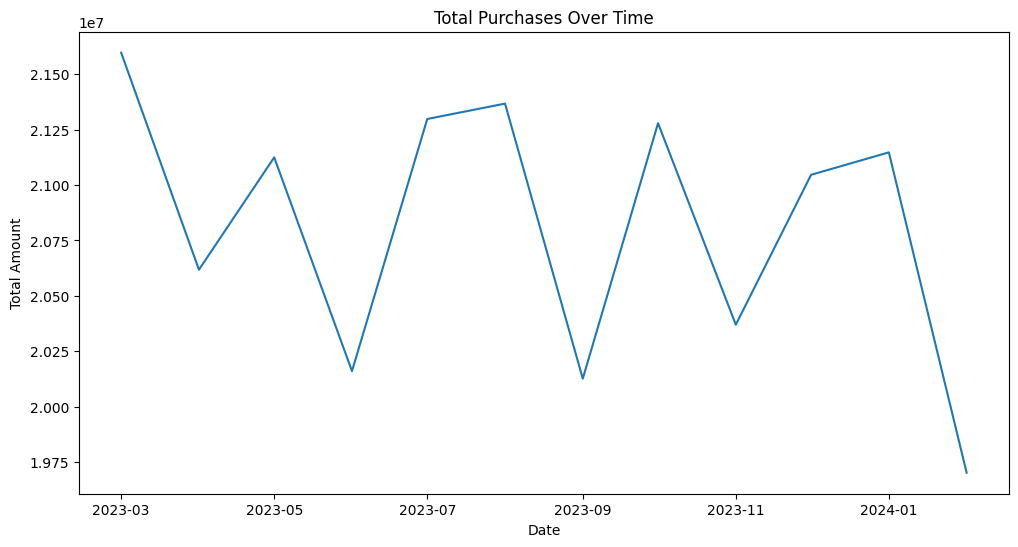

In [26]:
# Total Purchases Over Time

# Correct date parsing w/ error handling
transaction_details['Date'] = pd.to_datetime(transaction_details['Date'], errors='coerce')

# Drop rows w/ invalid dates
transaction_details = transaction_details.dropna(subset=['Date'])

# Group by month & sum the total amount
transaction_details['Month'] = transaction_details['Date'].dt.to_period('M')
monthly_sales = transaction_details.groupby('Month').agg({'Total_Amount': 'sum'}).reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Amount', data=monthly_sales)
plt.title('Total Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

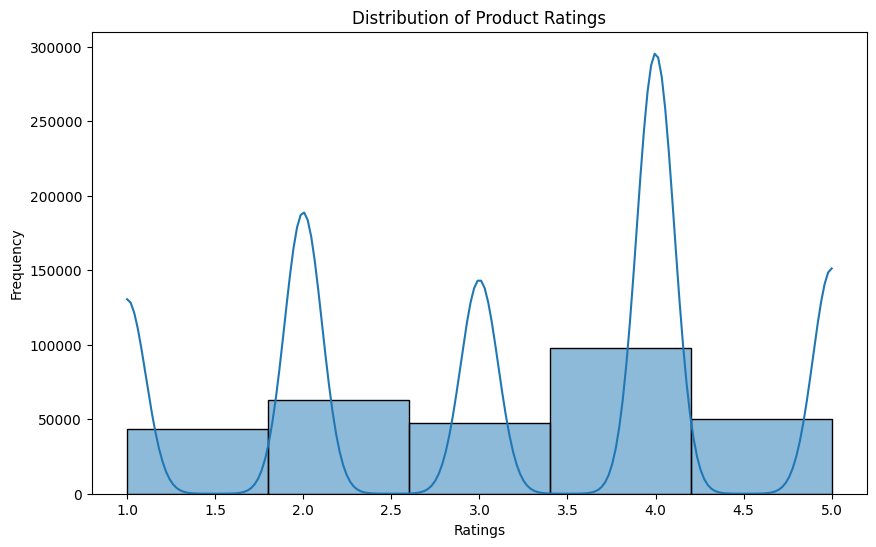

In [27]:
# Product Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(feedback['Ratings'], bins=5, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

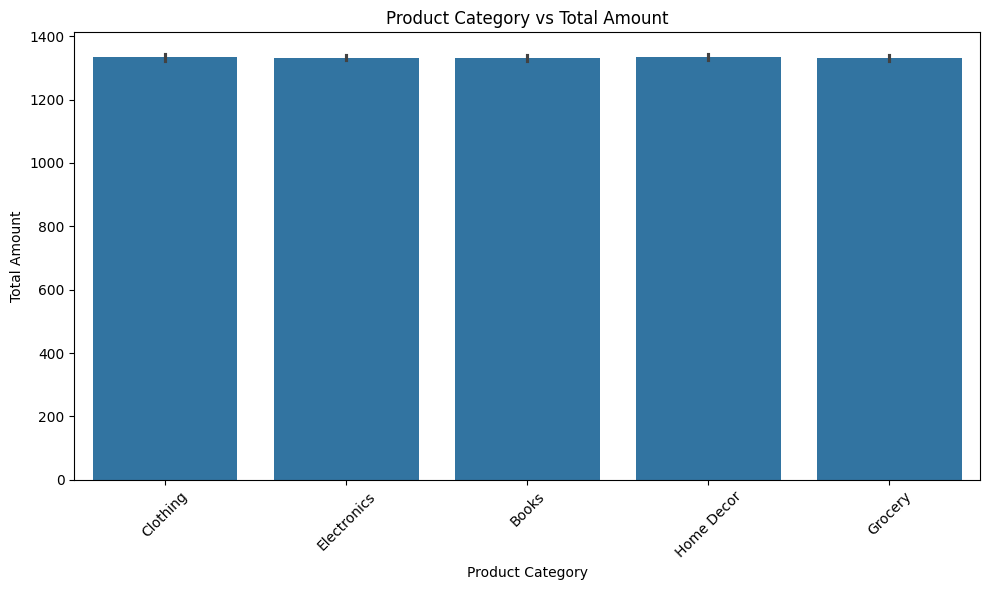

In [28]:
# Sales by Product Category

# Merge transaction_details with product_info on Product_ID
merged_data = pd.merge(transaction_details, product_info, on='Transaction_ID', how='inner')

# Plotting Product_Category vs Total_Amount
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Total_Amount', data=merged_data)
plt.title('Product Category vs Total Amount')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

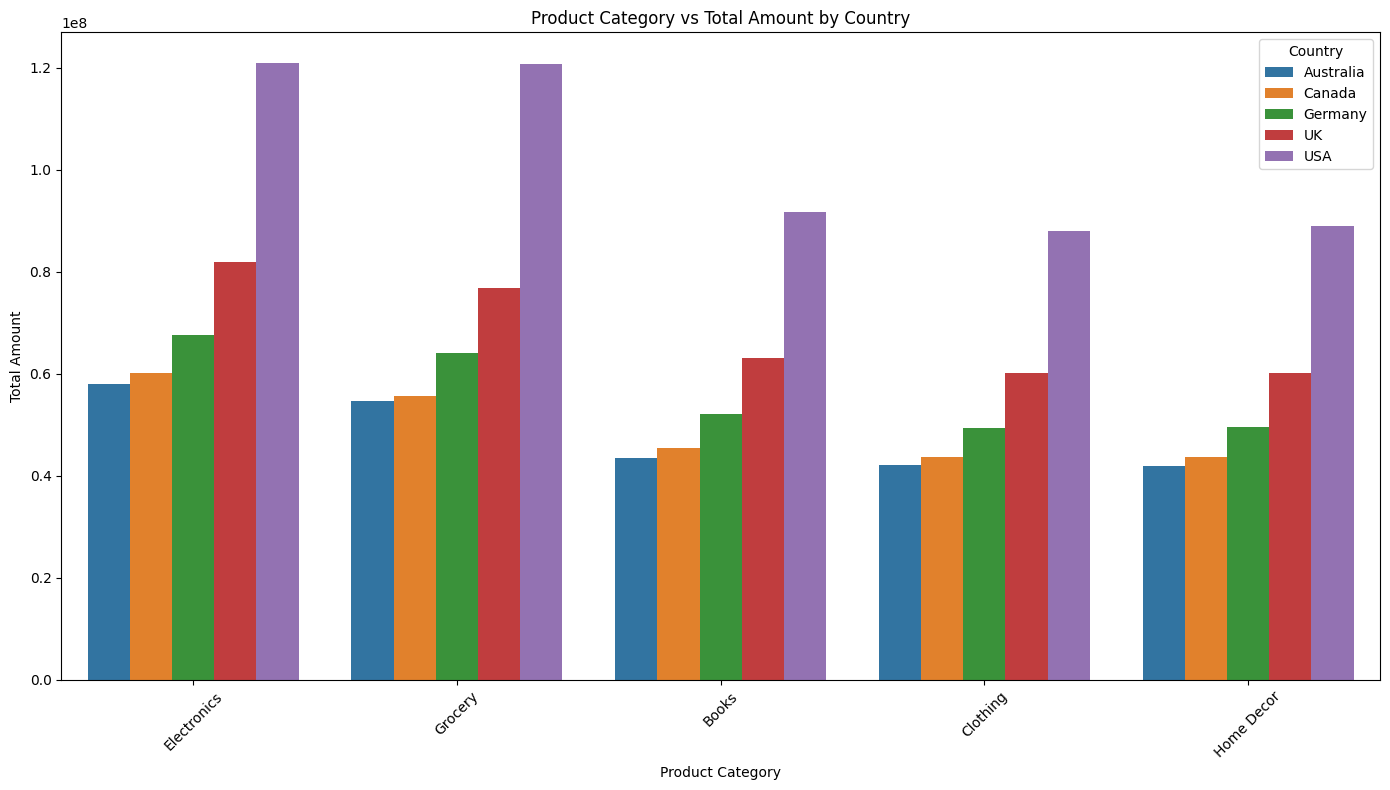

In [29]:
# Merge transaction_details w/ customer_info and product_info
merged_data = pd.merge(transaction_details, customer_info, on='Customer_ID')
merged_data = pd.merge(merged_data, product_info, on='Transaction_ID')

# Group by Country & Product_Category to calculate total amount for each category
sales_by_category_country = merged_data.groupby(['Country', 'Product_Category'])['Total_Amount'].sum().reset_index()

# Sort the data by Country & Total_Amount w/in each country
sales_by_category_country = sales_by_category_country.sort_values(by=['Country', 'Total_Amount'], ascending=[True, False])

# Plotting Product_Category vs Total_Amount grouped by Country
plt.figure(figsize=(14, 8))
sns.barplot(x='Product_Category', y='Total_Amount', hue='Country', data=sales_by_category_country)
plt.title('Product Category vs Total Amount by Country')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

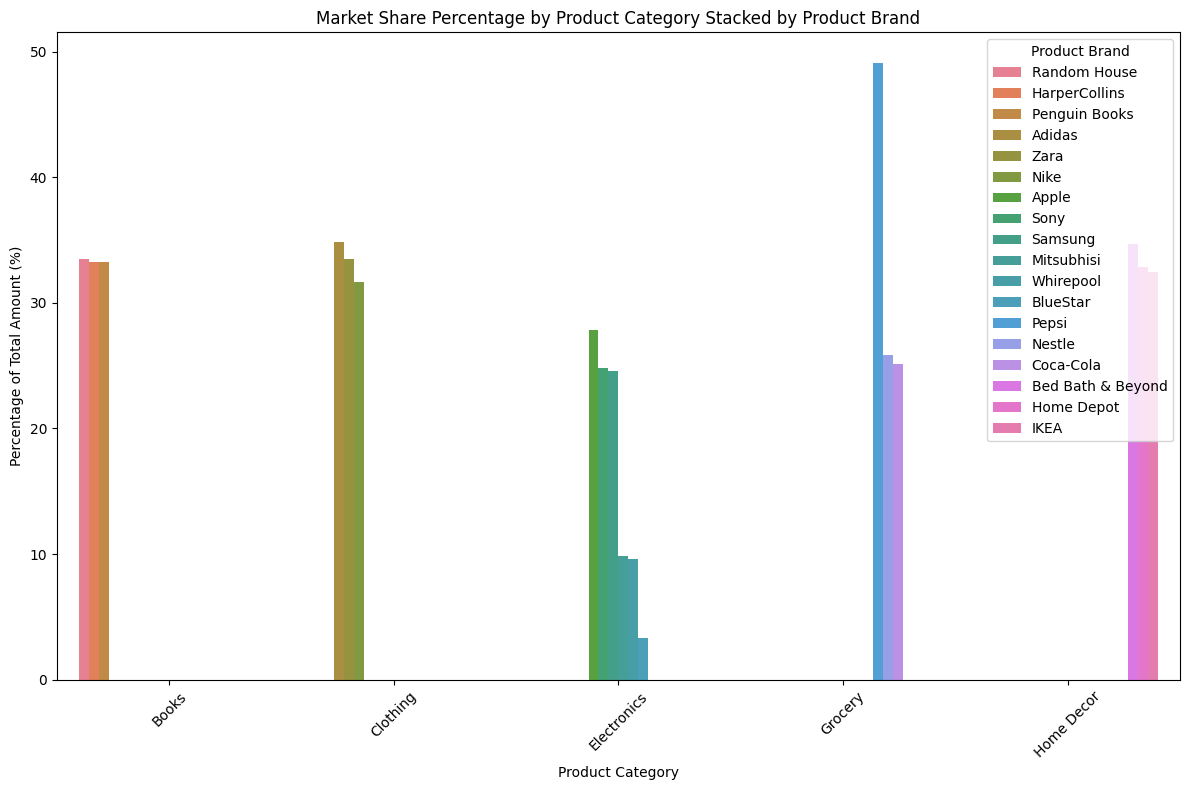

In [30]:
# Display market share

# Merge transaction_details w/ product_info merged on 'Transaction_ID'
merged_data = pd.merge(transaction_details, product_info, on='Transaction_ID', how='inner')

# Calculate total amount per Product_Category & Product_Brand
total_amount = merged_data.groupby(['Product_Category', 'Product_Brand'])['Total_Amount'].sum().reset_index()

# Calculate total amount per Product_Category
total_amount_category = total_amount.groupby('Product_Category')['Total_Amount'].sum().reset_index()

# Merge total_amount with total_amount_category to calculate percentage
total_amount = pd.merge(total_amount, total_amount_category, on='Product_Category', suffixes=('', '_total'))

# Calculate percentage of total amount within each Product_Category
total_amount['Percentage'] = 100 * total_amount['Total_Amount'] / total_amount['Total_Amount_total']

# Sort the data within each Product_Category by Percentage in descending order
total_amount.sort_values(['Product_Category', 'Percentage'], ascending=[True, False], inplace=True)

# Sort total_amount by Product_Category and Percentage
total_amount.sort_values(by=['Product_Category', 'Percentage'], ascending=[True, False], inplace=True)

# Plotting Product_Category vs Percentage of Total Amount stacked by Product_Brand
plt.figure(figsize=(12, 8))
sns.barplot(x='Product_Category', y='Percentage', hue='Product_Brand', data=total_amount)
plt.title('Market Share Percentage by Product Category Stacked by Product Brand')
plt.xlabel('Product Category')
plt.ylabel('Percentage of Total Amount (%)')
plt.xticks(rotation=45)
plt.legend(title='Product Brand', loc='upper right')
plt.tight_layout()
plt.show()

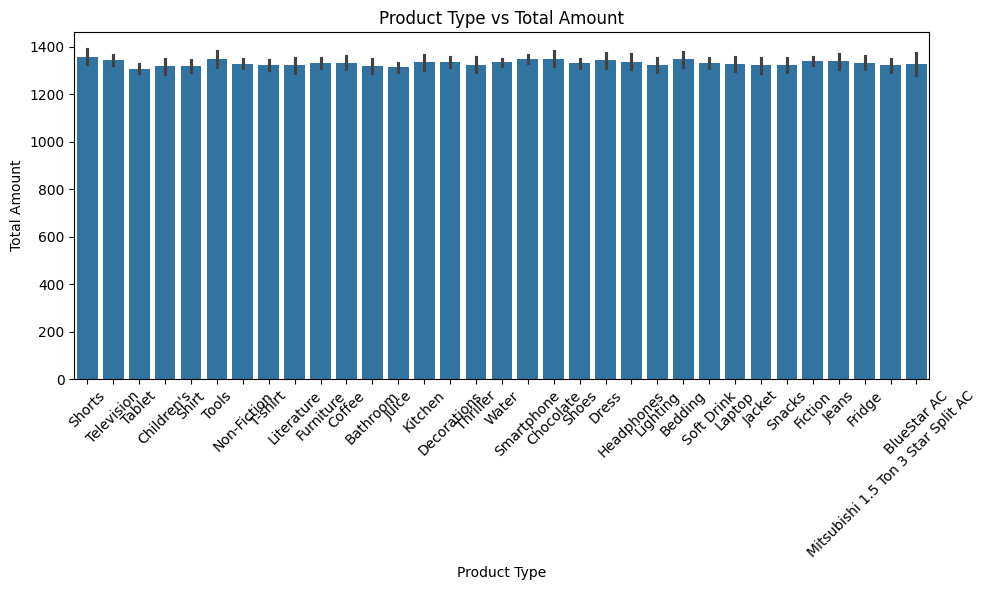

In [31]:
# Sales by Product Type

# Merge transaction_details with product_info on Product_ID
merged_data = pd.merge(transaction_details, product_info, on='Transaction_ID', how='inner')

# Plotting Product_Type vs Total_Amount
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Type', y='Total_Amount', data=merged_data)
plt.title('Product Type vs Total Amount')
plt.xlabel('Product Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

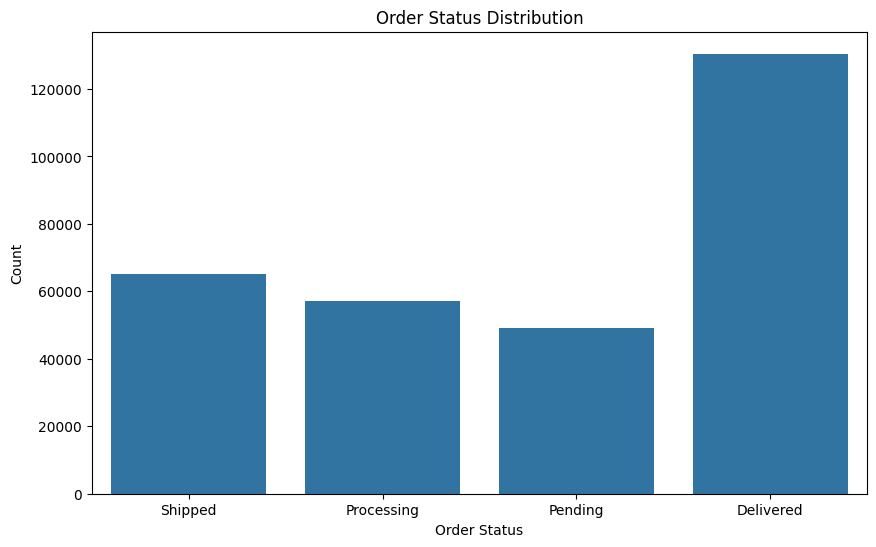

In [32]:
# Order Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Order_Status', data=transaction_logistics)
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

In [33]:
#pip install mlxtend

In [56]:
# Association rule mining

from mlxtend.frequent_patterns import apriori, association_rules

# Merge transaction_details with product_info on Transaction_ID
merged_data = pd.merge(transaction_details, product_info, on='Transaction_ID', how='inner')

merged_data.head()

,Transaction_ID,Customer_ID,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_ID,Product_Category,Product_Brand,Product_Type,products
0,8691788.0,37249.0,2023-09-18,2023.0,2023-09,22:03:55,3.0,108.028757,324.086270,P000,Clothing,Nike,Shorts,Cycling shorts
1,8691788.0,37249.0,2023-09-18,2023.0,2023-09,22:03:55,3.0,108.028757,324.086270,P193,Electronics,Sony,Television,LED TV
2,2174773.0,69749.0,2023-12-31,2023.0,2023-12,8:42:04,2.0,403.353907,806.707815,P001,Electronics,Samsung,Tablet,Lenovo Tab
3,6679610.0,30192.0,2023-04-26,2023.0,2023-04,4:06:29,3.0,354.477600,1063.432799,P002,Books,Penguin Books,Children's,Sports equipment
4,6095326.0,41289.0,2023-09-21,2023.0,2023-09,23:24:27,4.0,296.291806,1185.167224,P001,Electronics,Apple,Tablet,Lenovo Tab


In [57]:
# Verify merged data and select necessary columns
basket = merged_data[['Transaction_ID', 'products']]

basket.head()

,Transaction_ID,products
0,8691788.0,Cycling shorts
1,8691788.0,LED TV
2,2174773.0,Lenovo Tab
3,6679610.0,Sports equipment
4,6095326.0,Lenovo Tab


In [58]:
# Pivot the data
basket = basket.pivot_table(index='Transaction_ID', columns='products', aggfunc='size', fill_value=0)

basket.head()

products,4K TV,A-line dress,Acer Iconia Tab,Acer Swift,Action,Adventure,Affogato,Air conditioner,Alkaline water,Amazon Fire Tablet,...,White chocolate,Wide-leg jeans,Windbreaker,Window AC,Wireless headphones,Wrap dress,Wrench,Xiaomi Mi,iPad,iPhone
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000007.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000043.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000154.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000219.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000294.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


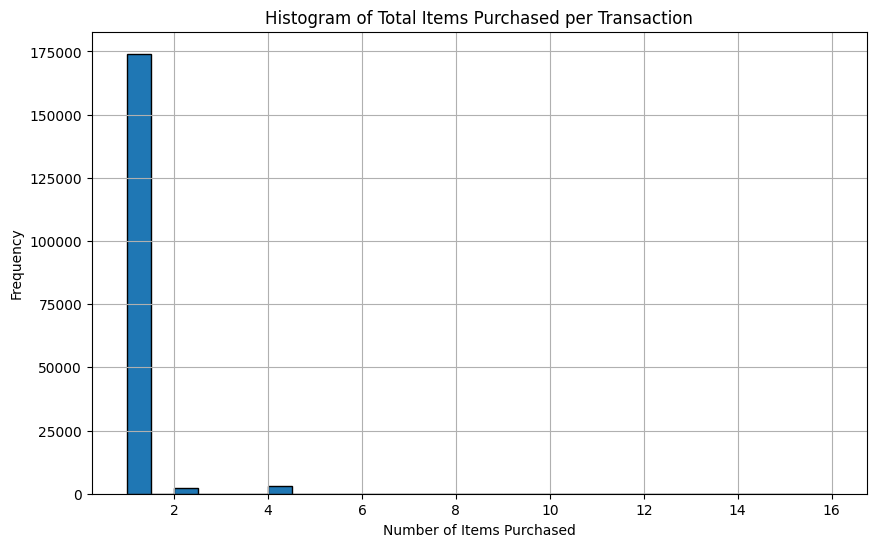

In [59]:
# Sum products purchased per transaction
items_per_transaction = basket.sum(axis=1)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(items_per_transaction, bins=30, edgecolor='black')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Frequency')
plt.title('Histogram of Total Items Purchased per Transaction')
plt.grid(True)
plt.show()

In [60]:
# Calculate total purchases
basket['Total Purchases'] = basket.sum(axis=1)

# Count occurrences of each total purchase count
purchase_counts = basket['Total Purchases'].value_counts().sort_index()

# Print the counts for each number of products per transaction
print("Number of transactions by number of products:")
for count, num_transactions in purchase_counts.items():
    print(f"{count} products: {num_transactions} transactions")

Number of transactions by number of products:
1 products: 174078 transactions
2 products: 2233 transactions
3 products: 36 transactions
4 products: 3079 transactions
6 products: 44 transactions
9 products: 28 transactions
16 products: 1 transactions


In [70]:
# Filter transactions w/ ≥ 2 products
basket_with_multiple_products = purchase_counts = basket[basket['Total Purchases'] >= 2]

# Drop the Total Purchases column to not include in results
basket_with_multiple_products = basket_with_multiple_products.drop(columns=['Total Purchases'])

# Ensure dummy variables are correctly set for products
basket_with_multiple_products = basket_with_multiple_products.astype(bool).astype(int)

# Apply association rule mining
frequent_itemsets = apriori(basket_with_multiple_products, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.8)

# Sorting rules by lift in descending order
rules_sorted = rules.sort_values(by='lift', ascending=False)

# Displaying the top rules
print("Top 10 Association Rules by Lift:")
rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

/Users/jesse/opt/anaconda3/envs/APS/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Association Rules by Lift:


,antecedents,consequents,support,confidence,lift
4,(Huawei MediaPad),(Google Pixel Slate),0.001107,0.142857,11.733766
5,(Google Pixel Slate),(Huawei MediaPad),0.001107,0.090909,11.733766
0,(Memoir),(Cooking),0.001107,0.115385,8.568493
1,(Cooking),(Memoir),0.001107,0.082192,8.568493
8,(iPhone),(Sony Xperia),0.001291,0.092105,5.944079
9,(Sony Xperia),(iPhone),0.001291,0.083333,5.944079
2,(Science),(Cooking),0.001107,0.075000,5.569521
3,(Cooking),(Science),0.001107,0.082192,5.569521
6,(History),(Psychology),0.001107,0.061856,5.004770
7,(Psychology),(History),0.001107,0.089552,5.004770


Rule 4: (Huawei MediaPad) -> (Google Pixel Slate)

Support: 0.001107

This means that 0.1107% of all transactions contain both Huawei MediaPad and Google Pixel Slate.

Confidence: 0.142857

Among all transactions that contain Huawei MediaPad, 14.29% also contain Google Pixel Slate.

Lift: 11.733766

Transactions containing Huawei MediaPad are about 11.73 times more likely to also contain Google Pixel Slate compared to transactions in general.